### TASK 0: IMPORT OF REQUIRED LIBRARIES

In [65]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import skimage as ski

### DATASET

**TASKS**
1) Read in the image and visualize slices in 3 different planes
2) Find your phantom and crop it out
3) Find an object within your phantom

NB: The image needs to be fliped and rotated to match the orientation of the radiological convention 

##### **Useful functions and hints**

**Loading a nifti file:**

Nibabel does not load the image array from the proxy when you load the image. It waits until you ask for the array data. The standard way to ask for the array data is to call the 
get_fdata() method:

- `img = nib.load('imgFile')`
- `data = img.get_fdata()`
- `info = img.header`

**Usefull functions for visualization:**
 - `np.flipud(np.fliplr()) to flip the image`
 - `plt.imshow() to visualize an image`
 - `ski.transform.rotate(img_plane,rot angle,resize=True) to rotate the image`
 - `plt.subplot() to generate subplots` 
 - `plt.colorbar() to add a colorbar`

**Hint to visulaizing the image in the radiological view**

- Flip the image\
`img_flip  = np.flipud(np.fliplr(data))`

- Get the right axis on the image\
`shape = img_flip.shape`\
`extent_axi = [0,shape[0],shape[1],0]`\
`extent_cor = [0,shape[0],0,shape[2]]`\
`extent_sag = [0,shape[1],0,shape[2]]`\

- Define slices\
`axial_slc = ...`\
`coronal_slc = ...`\
`sagittal_slc = ...`

- Rotate the image\
`rot_angle = 90`\
`img_plot_axi  = np.flipud(ski.transform.rotate(img_flip[:,:,axial_slc],rot_angle,resize=True))`\
`img_plot_cor  = ski.transform.rotate(img_flip[:,coronal_slc,:],rot_angle,resize=True)`\
`img_plot_sag  = ski.transform.rotate(img_flip[sagittal_slc,:,:],rot_angle,resize=True)`

- Plotting parameters\
`figsize_x = ...`, `figsize_y = ...`\
`rows = ...`, `columns = ...`\
`cmap = ...`

- Plot the image

`fig = plt.figure(figsize=(figsize_x,figsize_y)) `
 
 Axial plane\
`fig.add_subplot(rows, columns, 1)`\
`plt.title('Axial')`\
`figax = plt.imshow(img_plot_axi, cmap=cmap, extent=extent_axi)`\
`plt.xlabel('R-L [pixels]')`\
`plt.ylabel('A-P [pixels]')`
 
 Coronal plane\
`fig.add_subplot(rows, columns, 2)`\
`plt.title('Coronal')`\
`figax = plt.imshow(img_plot_cor, cmap=cmap, extent=extent_cor)`\
`plt.ylabel('S-I [pixel]')`\
`plt.xlabel('R-L [pixel]')`

 Sagittal plane\
`fig.add_subplot(rows, columns, 3)`\
`plt.title('Sagittal')`\
`figax = plt.imshow(img_plot_sag, cmap=cmap, extent=extent_sag)`\
`plt.ylabel('S-I [pixel]')`\
`plt.xlabel('A-P [pixel]')`\

`fig.tight_layout()`\
`plt.show()`


In [66]:
# Read Nifti file
img = nib.load('Dtus - CT BBH_CT_Lavdosis_BH_1.25mm_20240923083332_2.nii')
data = img.get_fdata()
info = img.header

In [67]:
# Visualize one slice in all three directions

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Marker values
sagittal_slice = 271  # marker from hint 68
coronal_slice = 295    # Our B5: 189. Marker from hint 148
axial_slice = 85     # Our B5: 453. Marker from hint 50

# Number of slices for each axis
sagittal_num_slices = data.shape[0]
coronal_num_slices = data.shape[1]
axial_num_slices = data.shape[2]

# Output widgets for each plot
output_sagittal = widgets.Output()
output_coronal = widgets.Output()
output_axial = widgets.Output()

# Create functions that update the displayed slice for each view
def sagittal_plot_slice(slice_idx):
    with output_sagittal:
        clear_output(wait=True)
        plt.imshow(data[slice_idx, :, :], cmap='gray')
        plt.title(f'Sagittal Slice {slice_idx}')
        plt.xlabel('z')
        plt.ylabel('y')
        plt.show()

def coronal_plot_slice(slice_idx):
    with output_coronal:
        clear_output(wait=True)
        plt.imshow(data[:, slice_idx, :], cmap='gray')
        plt.title(f'Coronal Slice {slice_idx}')
        plt.xlabel('z')
        plt.ylabel('x')
        plt.show()

def axial_plot_slice(slice_idx):
    with output_axial:
        clear_output(wait=True)
        plt.imshow(data[:, :, slice_idx], cmap='gray')
        plt.title(f'Axial Slice {slice_idx}')
        plt.xlabel('y')
        plt.ylabel('x')
        plt.show()

# Create sliders for each axis
sagittal_slice_slider = widgets.IntSlider(
    value=sagittal_slice,
    min=0,
    max=sagittal_num_slices - 1,
    step=1,
    description='Sagittal Slice:'
)
coronal_slice_slider = widgets.IntSlider(
    value=coronal_slice,
    min=0,
    max=coronal_num_slices - 1,
    step=1,
    description='Coronal Slice:'
)
axial_slice_slider = widgets.IntSlider(
    value=axial_slice,
    min=0,
    max=axial_num_slices - 1,
    step=1,
    description='Axial Slice:'
)

# Link the sliders to the plotting functions
widgets.interactive(sagittal_plot_slice, slice_idx=sagittal_slice_slider)
widgets.interactive(coronal_plot_slice, slice_idx=coronal_slice_slider)
widgets.interactive(axial_plot_slice, slice_idx=axial_slice_slider)

# Display each interactive plot separately with its own slider and output
display(widgets.VBox([sagittal_slice_slider, output_sagittal]))
display(widgets.VBox([coronal_slice_slider, output_coronal]))
display(widgets.VBox([axial_slice_slider, output_axial]))

In [68]:
# Crop image to get your phantom

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Replace these values with the actual indices for your phantom, look at the NOT rotated and flipped image!
x_min = 228  # Minimum x-index
x_max = 320  # Maximum x-index
y_min = 255  # Minimum y-index
y_max = 320  # Maximum y-index
z_min = 50   # Minimum z-index
z_max = 180  # Maximum z-index

# Crop the data (use 'data' instead of 'img')
data_cropped = data[x_min:x_max, y_min:y_max, z_min:z_max]

# Number of slices for each axis in the cropped data
sagittal_num_slices = data_cropped.shape[0]
coronal_num_slices = data_cropped.shape[1]
axial_num_slices = data_cropped.shape[2]

# Set up the slices (adjust based on your phantom's location)
sagittal_slice = sagittal_num_slices // 2
coronal_slice = coronal_num_slices // 2
axial_slice = 31

# Preprocess the rotated and flipped slices for each slice of the cropped volume
img_sagittal_all_slices = [np.flip(data_cropped[i, :, :], axis=0) for i in range(sagittal_num_slices)]
img_coronal_all_slices = [data_cropped[:, i, :] for i in range(coronal_num_slices)]
img_axial_all_slices = [np.rot90(data_cropped[:, :, i]) for i in range(axial_num_slices)]

# Create functions that update the displayed slice for each view
def sagittal_plot_slice(slice_idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(img_sagittal_all_slices[slice_idx], cmap='gray')
    plt.title(f'Sagittal Slice {slice_idx} (Cropped, Rotated, Flipped)')
    plt.xlabel('y')
    plt.ylabel('z')
    plt.show()

def coronal_plot_slice(slice_idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(img_coronal_all_slices[slice_idx], cmap='gray')
    plt.title(f'Coronal Slice {slice_idx} (Cropped, Rotated, Flipped)')
    plt.xlabel('z')
    plt.ylabel('x')
    plt.show()

def axial_plot_slice(slice_idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(img_axial_all_slices[slice_idx], cmap='gray')
    plt.title(f'Axial Slice {slice_idx} (Cropped, Rotated, Flipped)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Create sliders for each axis
sagittal_slice_slider = widgets.IntSlider(value=sagittal_slice, min=0, max=sagittal_num_slices - 1, step=1, description='Sagittal Slice:')
coronal_slice_slider = widgets.IntSlider(value=coronal_slice, min=0, max=coronal_num_slices - 1, step=1, description='Coronal Slice:')
axial_slice_slider = widgets.IntSlider(value=axial_slice, min=0, max=axial_num_slices - 1, step=1, description='Axial Slice:')

# Create interactive plots for each view
sagittal_interactive_plot = widgets.interactive(sagittal_plot_slice, slice_idx=sagittal_slice_slider)
coronal_interactive_plot = widgets.interactive(coronal_plot_slice, slice_idx=coronal_slice_slider)
axial_interactive_plot = widgets.interactive(axial_plot_slice, slice_idx=axial_slice_slider)

# Display each interactive plot separately with its own slider
display(sagittal_interactive_plot)
display(coronal_interactive_plot)
display(axial_interactive_plot)

interactive(children=(IntSlider(value=46, description='Sagittal Slice:', max=91), Output()), _dom_classes=('wi…

interactive(children=(IntSlider(value=32, description='Coronal Slice:', max=64), Output()), _dom_classes=('wid…

interactive(children=(IntSlider(value=31, description='Axial Slice:', max=129), Output()), _dom_classes=('widg…

In [69]:
# Visualize one slice in all three directions from one object in your phantom

### ANSWER: See the code above.

### TASK 1: Hounsfield Units
 - "Also, think about the tissue properties that generate contrast in CT imaging and draw conclusions about why
you might see less objects than with the previous modalities.":
    - The brightness in CT images is dynamically adjusted so that the brightest point is always shown as white and the darkest as black. When you crop the image or change the slice, the intensity scale adjusts, making the new brightest point white. As a result, something that was previously the brightest may appear less bright in the new view. This dynamic scaling can make it harder to distinguish certain objects, especially those with similar intensity values, because the contrast is redistributed.

In [70]:
# Plot one slice of your image and add a colorbar to investigate the intensity values

### We are plotting the same but this time with a colorbar. Notice, the color bar adjusts according to the intensity values in the interactive plot.
### Hounsfield-enheder (HU) bruges til at måle tætheden af væv i CT-billeder, og forskellige vævstyper har forskellige HU-værdier.
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming 'data_cropped', 'img_sagittal_all_slices', 'img_coronal_all_slices', and 'img_axial_all_slices' are already defined as in your code

# Create functions that update the displayed slice for each view, now with a colorbar
def sagittal_plot_slice(slice_idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(img_sagittal_all_slices[slice_idx], cmap='gray')
    plt.title(f'Sagittal Slice {slice_idx} (Cropped, Rotated, Flipped)')
    plt.xlabel('y')
    plt.ylabel('z')
    plt.colorbar(label='Intensity Values (HU)')  # Added colorbar here
    plt.show()

def coronal_plot_slice(slice_idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(img_coronal_all_slices[slice_idx], cmap='gray')
    plt.title(f'Coronal Slice {slice_idx} (Cropped, Rotated, Flipped)')
    plt.xlabel('z')
    plt.ylabel('x')
    plt.colorbar(label='Intensity Values (HU)')  # Added colorbar here
    plt.show()

def axial_plot_slice(slice_idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(img_axial_all_slices[slice_idx], cmap='gray')
    plt.title(f'Axial Slice {slice_idx} (Cropped, Rotated, Flipped)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar(label='Intensity Values (HU)')  # Added colorbar here
    plt.show()

# Create sliders for each axis
sagittal_slice_slider = widgets.IntSlider(
    value=sagittal_slice,
    min=0,
    max=sagittal_num_slices - 1,
    step=1,
    description='Sagittal Slice:'
)
coronal_slice_slider = widgets.IntSlider(
    value=coronal_slice,
    min=0,
    max=coronal_num_slices - 1,
    step=1,
    description='Coronal Slice:'
)
axial_slice_slider = widgets.IntSlider(
    value=axial_slice,
    min=0,
    max=axial_num_slices - 1,
    step=1,
    description='Axial Slice:'
)

# Create interactive plots for each view
sagittal_interactive_plot = widgets.interactive(sagittal_plot_slice, slice_idx=sagittal_slice_slider)
coronal_interactive_plot = widgets.interactive(coronal_plot_slice, slice_idx=coronal_slice_slider)
axial_interactive_plot = widgets.interactive(axial_plot_slice, slice_idx=axial_slice_slider)

# Display each interactive plot separately with its own slider
display(sagittal_interactive_plot)
display(coronal_interactive_plot)
display(axial_interactive_plot)

interactive(children=(IntSlider(value=46, description='Sagittal Slice:', max=91), Output()), _dom_classes=('wi…

interactive(children=(IntSlider(value=32, description='Coronal Slice:', max=64), Output()), _dom_classes=('wid…

interactive(children=(IntSlider(value=31, description='Axial Slice:', max=129), Output()), _dom_classes=('widg…

### TASK 2: Histogram

**Useful functions**
- `plt.hist(X, bins=)`
- `.ravel()`

Tip: X must be a 1D array

The histogram for the entire 3D cropped volume

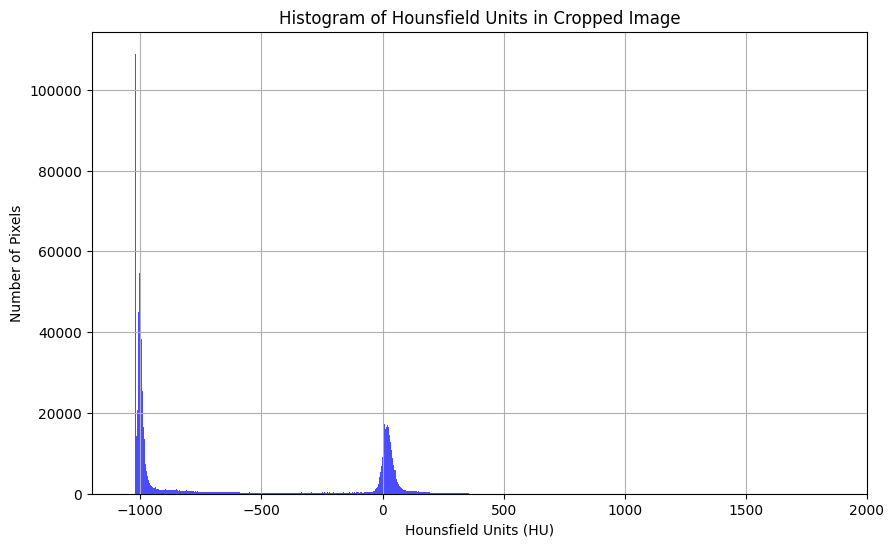

In [71]:
# Plot histogram

import numpy as np
import matplotlib.pyplot as plt

# Flatten the cropped image data into a 1D array
image_data_1d = data_cropped.ravel()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(image_data_1d, bins=1000, color='blue', alpha=0.7)
plt.title('Histogram of Hounsfield Units in Cropped Image')
plt.xlabel('Hounsfield Units (HU)')
plt.ylabel('Number of Pixels')
plt.xlim([-1200, 2000])  # Adjust the x-axis limits as needed. Typical HU values for medical images range from -1000 (air) to around 2000 (dense bone)
plt.grid(True)
plt.show()

Plot a histogram of the Hounsfield Units (HU) for a single 2D slice (axial slice 31) from the cropped data

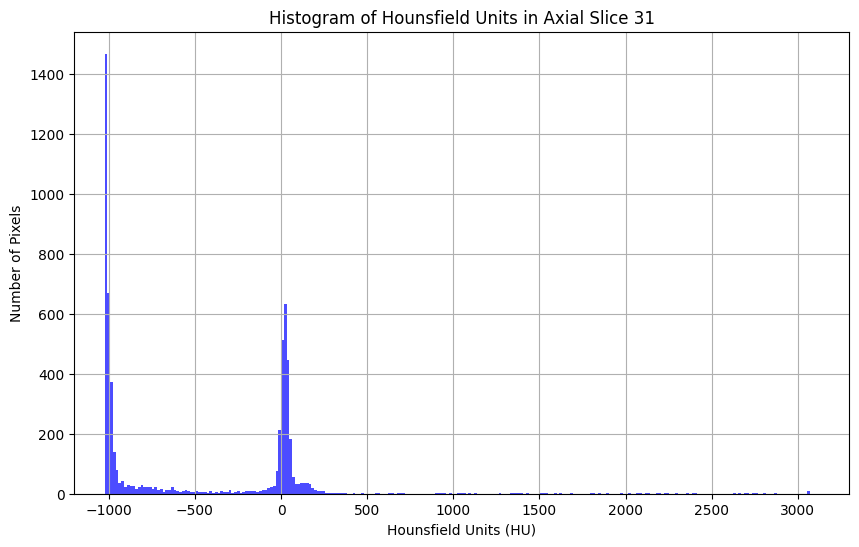

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'img_axial_all_slices' is already defined and contains the preprocessed slices

# Step 1: Select the axial slice index
axial_slice_index = 31  # Adjust as needed

# Step 2: Extract the 2D image data for the specified slice
slice_data = img_axial_all_slices[axial_slice_index]

# Step 3: Flatten the 2D slice data into a 1D array
slice_data_1d = slice_data.ravel()

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(slice_data_1d, bins=256, color='blue', alpha=0.7)
plt.title(f'Histogram of Hounsfield Units in Axial Slice {axial_slice_index}')
plt.xlabel('Hounsfield Units (HU)')
plt.ylabel('Number of Pixels')
plt.xlim([-1200, 3300])  # Adjust the x-axis limits as needed
plt.grid(True)
plt.show()

Cropped axial, coronal and saggital 2D images with color bar and histograms

In [73]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Assuming 'img_axial_all_slices', 'img_coronal_all_slices', 'img_sagittal_all_slices',
# 'axial_num_slices', 'coronal_num_slices', 'sagittal_num_slices',
# 'axial_slice', 'coronal_slice', and 'sagittal_slice' are already defined in your code.

sagittal_slice = 46
coronal_slice = 30
axial_slice = 31

# Global variables to hold the current histogram figure and metadata for saving
current_hist_fig = None
current_orientation = None
current_slice_idx = None

### Axial Slice with Histogram
def axial_plot_slice_with_histogram(slice_idx):
    global current_hist_fig, current_orientation, current_slice_idx
    orientation = "axial"
    
    # Extract the slice data
    slice_data = img_axial_all_slices[slice_idx]
    slice_data_1d = slice_data.ravel()
    
    # Create a figure with two subplots (displayed)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the axial slice
    im = axes[0].imshow(slice_data, cmap='gray')
    axes[0].set_title(f'Axial Slice {slice_idx} (Cropped, Rotated, Flipped)')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    fig.colorbar(im, ax=axes[0], label='Intensity Values (HU)')
    
    # Plot the histogram (on the right subplot)
    axes[1].hist(slice_data_1d, bins=256, color='blue', alpha=0.7)
    axes[1].set_title(f'Histogram of Hounsfield Units in Axial Slice {slice_idx}')
    axes[1].set_xlabel('Hounsfield Units (HU)')
    axes[1].set_ylabel('Number of Pixels')
    axes[1].set_xlim([-1000, 4000])  # Adjust as needed
    axes[1].set_ylim([0, 200])
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Now create a separate figure for the histogram only (not displayed)
    hist_fig = plt.figure(figsize=(6, 5))
    plt.hist(slice_data_1d, bins=256, color='blue', alpha=0.7)
    plt.title(f'{orientation.capitalize()} Slice {slice_idx} Histogram')
    plt.xlabel('Hounsfield Units (HU)')
    plt.ylabel('Number of Pixels')
    plt.xlim([-1000, 4000])  # Adjust as needed
    plt.ylim([0, 200])
    plt.grid(True)
    # Do not show this figure - just store it
    # Close it after creation so it doesn't clutter the notebook
    plt.close(hist_fig)
    
    # Store the histogram figure and metadata globally
    current_hist_fig = hist_fig
    current_orientation = orientation
    current_slice_idx = slice_idx

# Create an interactive slider for axial slice
axial_slice_slider = widgets.IntSlider(
    value=axial_slice,
    min=0,
    max=axial_num_slices - 1,
    step=1,
    description='Axial Slice:'
)

axial_interactive_plot = widgets.interactive(axial_plot_slice_with_histogram, slice_idx=axial_slice_slider)

### Coronal Slice with Histogram
def coronal_plot_slice_with_histogram(slice_idx):
    global current_hist_fig, current_orientation, current_slice_idx
    orientation = "coronal"
    
    # Extract the slice data
    slice_data = img_coronal_all_slices[slice_idx]
    slice_data_1d = slice_data.ravel()
    
    # Create a figure with two subplots (displayed)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the coronal slice
    im = axes[0].imshow(slice_data, cmap='gray')
    axes[0].set_title(f'Coronal Slice {slice_idx} (Cropped, Rotated, Flipped)')
    axes[0].set_xlabel('z')
    axes[0].set_ylabel('x')
    fig.colorbar(im, ax=axes[0], label='Intensity Values (HU)')
    
    # Plot the histogram (on the right subplot)
    axes[1].hist(slice_data_1d, bins=256, color='blue', alpha=0.7)
    axes[1].set_title(f'Histogram of Hounsfield Units in Coronal Slice {slice_idx}')
    axes[1].set_xlabel('Hounsfield Units (HU)')
    axes[1].set_ylabel('Number of Pixels')
    axes[1].set_xlim([-1000, 4000])  # Adjust as needed
    axes[1].set_ylim([0, 200])
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Now create a separate figure for the histogram only (not displayed)
    hist_fig = plt.figure(figsize=(6, 5))
    plt.hist(slice_data_1d, bins=256, color='blue', alpha=0.7)
    plt.title(f'{orientation.capitalize()} Slice {slice_idx} Histogram')
    plt.xlabel('Hounsfield Units (HU)')
    plt.ylabel('Number of Pixels')
    plt.xlim([-1000, 4000])  # Adjust as needed
    plt.ylim([0, 200])
    plt.grid(True)
    plt.close(hist_fig)
    
    current_hist_fig = hist_fig
    current_orientation = orientation
    current_slice_idx = slice_idx

# Create an interactive slider for coronal slice
coronal_slice_slider = widgets.IntSlider(
    value=coronal_slice,
    min=0,
    max=coronal_num_slices - 1,
    step=1,
    description='Coronal Slice:'
)

coronal_interactive_plot = widgets.interactive(coronal_plot_slice_with_histogram, slice_idx=coronal_slice_slider)

### Sagittal Slice with Histogram
def sagittal_plot_slice_with_histogram(slice_idx):
    global current_hist_fig, current_orientation, current_slice_idx
    orientation = "sagittal"
    
    # Extract the slice data
    slice_data = img_sagittal_all_slices[slice_idx]
    slice_data_1d = slice_data.ravel()
    
    # Create a figure with two subplots (displayed)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the sagittal slice
    im = axes[0].imshow(slice_data, cmap='gray')
    axes[0].set_title(f'Sagittal Slice {slice_idx} (Cropped, Rotated, Flipped)')
    axes[0].set_xlabel('y')
    axes[0].set_ylabel('z')
    fig.colorbar(im, ax=axes[0], label='Intensity Values (HU)')
    
    # Plot the histogram (on the right subplot)
    axes[1].hist(slice_data_1d, bins=256, color='blue', alpha=0.7)
    axes[1].set_title(f'Histogram of Hounsfield Units in Sagittal Slice {slice_idx}')
    axes[1].set_xlabel('Hounsfield Units (HU)')
    axes[1].set_ylabel('Number of Pixels')
    axes[1].set_xlim([-1300, 4000])  # Adjust as needed
    axes[1].set_ylim([0, 200])
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Now create a separate figure for the histogram only (not displayed)
    hist_fig = plt.figure(figsize=(6, 5))
    plt.hist(slice_data_1d, bins=256, color='blue', alpha=0.7)
    plt.title(f'{orientation.capitalize()} Slice {slice_idx} Histogram')
    plt.xlabel('Hounsfield Units (HU)')
    plt.ylabel('Number of Pixels')
    plt.xlim([-1300, 4000])  # Adjust as needed
    plt.ylim([0, 200])
    plt.grid(True)
    plt.close(hist_fig)
    
    current_hist_fig = hist_fig
    current_orientation = orientation
    current_slice_idx = slice_idx

# Create an interactive slider for sagittal slice
sagittal_slice_slider = widgets.IntSlider(
    value=sagittal_slice,
    min=0,
    max=sagittal_num_slices - 1,
    step=1,
    description='Sagittal Slice:'
)

sagittal_interactive_plot = widgets.interactive(sagittal_plot_slice_with_histogram, slice_idx=sagittal_slice_slider)

# Button to save the currently displayed histogram
save_button = widgets.Button(description='Save Histogram')

def save_histogram(b):
    global current_hist_fig, current_orientation, current_slice_idx
    if current_hist_fig is not None and current_orientation is not None and current_slice_idx is not None:
        filename = f'{current_orientation}_slice_{current_slice_idx}_histogram.png'
        current_hist_fig.savefig(filename, bbox_inches='tight')
        print(f"Histogram saved as '{filename}'")
    else:
        print("No histogram to save!")

save_button.on_click(save_histogram)

# Display the interactive plots and the save button
display(sagittal_interactive_plot)
display(coronal_interactive_plot)
display(axial_interactive_plot)
display(save_button)


interactive(children=(IntSlider(value=46, description='Sagittal Slice:', max=91), Output()), _dom_classes=('wi…

interactive(children=(IntSlider(value=30, description='Coronal Slice:', max=64), Output()), _dom_classes=('wid…

interactive(children=(IntSlider(value=31, description='Axial Slice:', max=129), Output()), _dom_classes=('widg…

Button(description='Save Histogram', style=ButtonStyle())

### TASK 3: Window level function 
Write a window level function to view a meaningful range of values in your image.

 - We can probably see the stick (?) at axial slice=100 in the lower right corner – you can see a darker line going grom the lower right corner pointing somehow towards the upper left corner.

 - 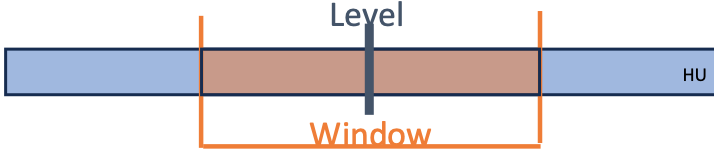

In [74]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Assuming 'img_axial_all_slices', 'img_coronal_all_slices', 'img_sagittal_all_slices',
# 'axial_num_slices', 'coronal_num_slices', 'sagittal_num_slices' are already defined in your code.

# Window-Level Transformation Function
def window_level(image, window, level):
    upper_bound = level + (window / 2)
    lower_bound = level - (window / 2)
    
    # Clip the image values to the window range
    Xclipped = np.maximum(np.minimum(image, upper_bound), lower_bound)
    
    # Normalize the clipped values
    X_WL = (Xclipped - lower_bound) / (upper_bound - lower_bound)
    
    return X_WL, lower_bound, upper_bound  # Return bounds for use in plotting

# Define default values for window and level
default_window = 400
default_level = 0

sagittal_slice = 46
coronal_slice = 30
axial_slice = 31

### Axial Slice with Histogram
def axial_plot_slice_with_histogram(slice_idx, window, level):
    # Extract the slice data
    slice_data = img_axial_all_slices[slice_idx]
    
    # Apply window-level transformation
    slice_data_WL, lower_bound, upper_bound = window_level(slice_data, window, level)
    
    # Flatten the windowed data for histogram
    slice_data_1d = slice_data_WL.ravel()
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the axial slice with window-level transformation
    im = axes[0].imshow(slice_data_WL, cmap='gray', vmin=0, vmax=1)
    axes[0].set_title(f'Axial Slice {slice_idx} (Window: {window}, Level: {level})')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    fig.colorbar(im, ax=axes[0], label='Normalized Intensity')
    
    # Plot the histogram
    axes[1].hist(slice_data.ravel(), bins=256, color='blue', alpha=0.7)
    axes[1].set_title(f'Histogram of Hounsfield Units in Axial Slice {slice_idx}')
    axes[1].set_xlabel('Hounsfield Units (HU)')
    axes[1].set_ylabel('Number of Pixels')
    axes[1].set_xlim([lower_bound, upper_bound])  # Set x-axis limits to window range
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Create interactive sliders for axial slice
axial_slice_slider = widgets.IntSlider(value=axial_slice, min=0, max=axial_num_slices - 1, step=1, description='Axial Slice:')
axial_window_slider = widgets.IntSlider(value=default_window, min=100, max=2000, step=100, description='Window:')
axial_level_slider = widgets.IntSlider(value=default_level, min=-1000, max=1000, step=50, description='Level:')

axial_interactive_plot = widgets.interactive(axial_plot_slice_with_histogram, 
                                             slice_idx=axial_slice_slider, 
                                             window=axial_window_slider, 
                                             level=axial_level_slider)

### Coronal Slice with Histogram
def coronal_plot_slice_with_histogram(slice_idx, window, level):
    # Extract the slice data
    slice_data = img_coronal_all_slices[slice_idx]
    
    # Apply window-level transformation
    slice_data_WL, lower_bound, upper_bound = window_level(slice_data, window, level)
    
    # Flatten the windowed data for histogram
    slice_data_1d = slice_data_WL.ravel()
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the coronal slice with window-level transformation
    im = axes[0].imshow(slice_data_WL, cmap='gray', vmin=0, vmax=1)
    axes[0].set_title(f'Coronal Slice {slice_idx} (Window: {window}, Level: {level})')
    axes[0].set_xlabel('z')
    axes[0].set_ylabel('x')
    fig.colorbar(im, ax=axes[0], label='Normalized Intensity')
    
    # Plot the histogram
    axes[1].hist(slice_data.ravel(), bins=256, color='blue', alpha=0.7)
    axes[1].set_title(f'Histogram of Hounsfield Units in Coronal Slice {slice_idx}')
    axes[1].set_xlabel('Hounsfield Units (HU)')
    axes[1].set_ylabel('Number of Pixels')
    axes[1].set_xlim([lower_bound, upper_bound])  # Set x-axis limits to window range
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Create interactive sliders for coronal slice
coronal_slice_slider = widgets.IntSlider(value=coronal_slice, min=0, max=coronal_num_slices - 1, step=1, description='Coronal Slice:')
coronal_window_slider = widgets.IntSlider(value=default_window, min=100, max=2000, step=100, description='Window:')
coronal_level_slider = widgets.IntSlider(value=default_level, min=-1000, max=1000, step=50, description='Level:')

coronal_interactive_plot = widgets.interactive(coronal_plot_slice_with_histogram, 
                                               slice_idx=coronal_slice_slider, 
                                               window=coronal_window_slider, 
                                               level=coronal_level_slider)

### Sagittal Slice with Histogram
def sagittal_plot_slice_with_histogram(slice_idx, window, level):
    # Extract the slice data
    slice_data = img_sagittal_all_slices[slice_idx]
    
    # Apply window-level transformation
    slice_data_WL, lower_bound, upper_bound = window_level(slice_data, window, level)
    
    # Flatten the windowed data for histogram
    slice_data_1d = slice_data_WL.ravel()
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the sagittal slice with window-level transformation
    im = axes[0].imshow(slice_data_WL, cmap='gray', vmin=0, vmax=1)
    axes[0].set_title(f'Sagittal Slice {slice_idx} (Window: {window}, Level: {level})')
    axes[0].set_xlabel('y')
    axes[0].set_ylabel('z')
    fig.colorbar(im, ax=axes[0], label='Normalized Intensity')
    
    # Plot the histogram
    axes[1].hist(slice_data.ravel(), bins=256, color='blue', alpha=0.7)
    axes[1].set_title(f'Histogram of Hounsfield Units in Sagittal Slice {slice_idx}')
    axes[1].set_xlabel('Hounsfield Units (HU)')
    axes[1].set_ylabel('Number of Pixels')
    axes[1].set_xlim([lower_bound, upper_bound])  # Set x-axis limits to window range
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

# Add Save Functionality
def save_slice_as_png(slice_data, window, level, slice_idx, slice_type):
    # Apply window-level transformation
    slice_data_WL, _, _ = window_level(slice_data, window, level)
    
    # Plot the slice
    plt.figure(figsize=(6, 6))
    plt.imshow(slice_data_WL, cmap='gray', vmin=0, vmax=1)
    plt.title(f'{slice_type} Slice {slice_idx} (Window: {window}, Level: {level})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar(label='Normalized Intensity')
    
    # Save the plot as PNG
    filename = f"{slice_type}_Slice_{slice_idx}_Window_{window}_Level_{level}.png"
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved {filename}")

# Add Save Button and Functionality to Axial Slice
def axial_save_slice(slice_idx, window, level):
    slice_data = img_axial_all_slices[slice_idx]
    save_slice_as_png(slice_data, window, level, slice_idx, "Axial")

axial_save_button = widgets.Button(description="Save Axial Slice")
axial_save_button.on_click(lambda _: axial_save_slice(axial_slice_slider.value, axial_window_slider.value, axial_level_slider.value))

# Add Save Button and Functionality to Coronal Slice
def coronal_save_slice(slice_idx, window, level):
    slice_data = img_coronal_all_slices[slice_idx]
    save_slice_as_png(slice_data, window, level, slice_idx, "Coronal")

coronal_save_button = widgets.Button(description="Save Coronal Slice")
coronal_save_button.on_click(lambda _: coronal_save_slice(coronal_slice_slider.value, coronal_window_slider.value, coronal_level_slider.value))

# Add Save Button and Functionality to Sagittal Slice
def sagittal_save_slice(slice_idx, window, level):
    slice_data = img_sagittal_all_slices[slice_idx]
    save_slice_as_png(slice_data, window, level, slice_idx, "Sagittal")

sagittal_save_button = widgets.Button(description="Save Sagittal Slice")
sagittal_save_button.on_click(lambda _: sagittal_save_slice(sagittal_slice_slider.value, sagittal_window_slider.value, sagittal_level_slider.value))



# Create interactive sliders for sagittal slice
sagittal_slice_slider = widgets.IntSlider(value=sagittal_slice, min=0, max=sagittal_num_slices - 1, step=1, description='Sagittal Slice:')
sagittal_window_slider = widgets.IntSlider(value=default_window, min=100, max=2000, step=100, description='Window:')
sagittal_level_slider = widgets.IntSlider(value=default_level, min=-1000, max=1000, step=50, description='Level:')

sagittal_interactive_plot = widgets.interactive(sagittal_plot_slice_with_histogram, 
                                                slice_idx=sagittal_slice_slider, 
                                                window=sagittal_window_slider, 
                                                level=sagittal_level_slider)

# Display Interactive Plots with Save Buttons
display(sagittal_interactive_plot, sagittal_save_button)
display(coronal_interactive_plot, coronal_save_button)
display(axial_interactive_plot, axial_save_button)

interactive(children=(IntSlider(value=46, description='Sagittal Slice:', max=91), IntSlider(value=400, descrip…

Button(description='Save Sagittal Slice', style=ButtonStyle())

interactive(children=(IntSlider(value=30, description='Coronal Slice:', max=64), IntSlider(value=400, descript…

Button(description='Save Coronal Slice', style=ButtonStyle())

interactive(children=(IntSlider(value=31, description='Axial Slice:', max=129), IntSlider(value=400, descripti…

Button(description='Save Axial Slice', style=ButtonStyle())

### TASK 4: From HU to tissue properties

In [75]:
#your code here ...

### ANSWER: See the code above.

### TASK 5: Scalebar

Hint: 

The nifti header stores the resolution at which the image was acquired (i.e. the dimensions of a voxel in the 3D volume).

To obtain this information, call the following two functions. (pixel_dims saves 3 values for x, y and z in mm.)

- `X_info = img.header`
- `pixel_dims = X_info.get_zooms()`

In [76]:
# Visualize the 3D volume

X_info = img.header
pixel_dims = X_info.get_zooms()

# print X_info and pixel_dims
print("X_info: ", X_info)
print("______________________________________________")
print("Pixel dimensions: ", pixel_dims) # The first value is the x-axis, second us y-axis and the third is the z-axis. The values are often presented in millimeters.

X_info:  <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 469   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.976562  0.976562  1.25      0.        0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Time=83604.442'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 250.0
qoffset_y       : -249.

In [84]:
# Assuming the following variables and arrays are already defined in your environment:
# data_cropped, pixel_dims, img_axial_all_slices, img_coronal_all_slices, img_sagittal_all_slices, 
# default_window, default_level, axial_slice, coronal_slice, sagittal_slice
# as well as the function window_level(), and all necessary imports.

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import ipywidgets as widgets
from IPython.display import display

# Get the dimensions of the cropped data
img_shape = data_cropped.shape  # (sagittal_num_slices, coronal_num_slices, axial_num_slices)

# Calculate the physical size of the image in mm
img_width_mm = img_shape[0] * pixel_dims[0]  # x-axis (sagittal)
img_height_mm = img_shape[1] * pixel_dims[1]  # y-axis (coronal)
img_depth_mm = img_shape[2] * pixel_dims[2]   # z-axis (axial)

print(f"Image physical dimensions (mm): Width: {img_width_mm:.2f}, Height: {img_height_mm:.2f}, Depth: {img_depth_mm:.2f}")


def axial_plot_slice_with_histogram(slice_idx, window, level):
    # Extract the slice data
    slice_data = np.flip(img_axial_all_slices[slice_idx])
    
    # Apply window-level transformation
    slice_data_WL, lower_bound, upper_bound = window_level(slice_data, window, level)
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the axial slice with window-level transformation
    # origin='lower' so [0,0] is at bottom-left
    im = axes[0].imshow(slice_data_WL, cmap='gray', vmin=0, vmax=1, origin='lower')
    axes[0].set_title(f'Axial Slice {slice_idx} (Level: {window}, Width: {level})')
    
    # Axial orientation:
    # x-axis: Right lateral (left) --> Left lateral (right)
    # y-axis: Posterior (bottom) --> Anterior (top)
    axes[0].set_xlabel('<-- Right lateral -- Left lateral -->')
    axes[0].set_ylabel('<-- Posterior -- Anterior -->')
    
    fig.colorbar(im, ax=axes[0], label='Normalized Intensity')
    
    # Add scalebar
    scalebar_length_mm = 10  # Desired scalebar length in mm
    scalebar_length_px = scalebar_length_mm / pixel_dims[0]  # For axial slice, x pixel size = pixel_dims[0]
    fontprops = fm.FontProperties(size=12)
    scalebar = AnchoredSizeBar(axes[0].transData,
                               scalebar_length_px,  # Length of scalebar in pixels
                               f'{scalebar_length_mm} mm',  # Label
                               'lower right',  # Location
                               pad=0.5,
                               color='white',
                               frameon=False,
                               size_vertical=2,
                               fontproperties=fontprops)
    axes[0].add_artist(scalebar)
    
    # Plot the histogram
    axes[1].hist(slice_data.ravel(), bins=256, color='blue', alpha=0.7)
    axes[1].set_title(f'Histogram of Hounsfield Units in Axial Slice {slice_idx}')
    axes[1].set_xlabel('Number of Pixels')
    axes[1].set_ylabel('Hounsfield Units (HU)')
    axes[1].set_xlim([lower_bound, upper_bound])  # Set x-axis limits to window range
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

def coronal_plot_slice_with_histogram(slice_idx, window, level):
    # Extract the slice data
    slice_data = img_coronal_all_slices[slice_idx]
    
    # Apply window-level transformation
    slice_data_WL, lower_bound, upper_bound = window_level(slice_data, window, level)
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the coronal slice with window-level transformation
    im = axes[0].imshow(slice_data_WL, cmap='gray', vmin=0, vmax=1, origin='lower')
    axes[0].set_title(f'Coronal Slice {slice_idx} (Level: {window}, Width: {level})')
    
    # Coronal orientation:
    # x-axis (horizontal): Inferior (left) --> Superior (right)
    # y-axis (vertical): Left lateral (bottom) --> Right lateral (top)
    axes[0].set_xlabel('<-- Inferior -- Superior -->')
    axes[0].set_ylabel('<-- Left lateral -- Right lateral -->')
    
    fig.colorbar(im, ax=axes[0], label='Normalized Intensity')
    
    # Add scalebar
    scalebar_length_mm = 10
    scalebar_length_px = scalebar_length_mm / pixel_dims[2]  # z-axis pixel dim is pixel_dims[2]
    fontprops = fm.FontProperties(size=12)
    scalebar = AnchoredSizeBar(axes[0].transData,
                               scalebar_length_px,
                               f'{scalebar_length_mm} mm',
                               'lower right',
                               pad=0.5,
                               color='white',
                               frameon=False,
                               size_vertical=2,
                               fontproperties=fontprops)
    axes[0].add_artist(scalebar)
    
    # Plot the histogram
    axes[1].hist(slice_data.ravel(), bins=256, color='blue', alpha=0.7)
    axes[1].set_title(f'Histogram of Hounsfield Units in Coronal Slice {slice_idx}')
    axes[1].set_xlabel('Number of Pixels')
    axes[1].set_ylabel('Hounsfield Units (HU)')
    axes[1].set_xlim([lower_bound, upper_bound])  # Set x-axis limits to window range
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

def sagittal_plot_slice_with_histogram(slice_idx, window, level):
    # Extract the slice data
    slice_data = np.flip(img_sagittal_all_slices[slice_idx], axis=0)
    
    # Apply window-level transformation
    slice_data_WL, lower_bound, upper_bound = window_level(slice_data, window, level)
    
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot the sagittal slice with window-level transformation
    im = axes[0].imshow(slice_data_WL, cmap='gray', vmin=0, vmax=1, origin='lower')
    axes[0].set_title(f'Sagittal Slice {slice_idx} (Level: {window}, Width: {level})')
    
    # Sagittal orientation:
    # x-axis: Inferior (left) --> Superior (right)
    # y-axis: Posterior (bottom) --> Anterior (top)
    axes[0].set_xlabel('<-- Inferior -- Superior -->')
    axes[0].set_ylabel('<-- Posterior -- Anterior -->')
    
    fig.colorbar(im, ax=axes[0], label='Normalized Intensity')
    
    # Add scalebar
    scalebar_length_mm = 10
    scalebar_length_px = scalebar_length_mm / pixel_dims[1]  # y-axis pixel dim for sagittal
    fontprops = fm.FontProperties(size=12)
    scalebar = AnchoredSizeBar(axes[0].transData,
                               scalebar_length_px,
                               f'{scalebar_length_mm} mm',
                               'lower right',
                               pad=0.5,
                               color='white',
                               frameon=False,
                               size_vertical=2,
                               fontproperties=fontprops)
    axes[0].add_artist(scalebar)
    
    # Plot the histogram
    axes[1].hist(slice_data.ravel(), bins=256, color='blue', alpha=0.7)
    axes[1].set_title(f'Histogram of Hounsfield Units in Sagittal Slice {slice_idx}')
    axes[1].set_xlabel('Number of Pixels')
    axes[1].set_ylabel('Hounsfield Units (HU)')
    axes[1].set_xlim([lower_bound, upper_bound])  # Set x-axis limits to window range
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()


# Functions to save images and histograms
def save_slice_with_scalebar_as_png(slice_data, window, level, slice_idx, slice_type, scalebar_length_mm, pixel_dim):
    # Apply window-level transformation
    slice_data_WL, _, _ = window_level(slice_data, window, level)
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(slice_data_WL, cmap='gray', vmin=0, vmax=1, origin='lower')
    ax.set_title(f'{slice_type} Slice {slice_idx} (Level: {window}, Width: {level})')
    
    # Set axis labels according to slice type
    if slice_type == "Axial":
        # x-axis: Right lateral (left) --> Left lateral (right)
        # y-axis: Posterior (bottom) --> Anterior (top)
        ax.set_xlabel('<-- Right lateral -- Left lateral -->')
        ax.set_ylabel('<-- Posterior -- Anterior -->')
    elif slice_type == "Coronal":
        # x-axis: Inferior (left) --> Superior (right)
        # y-axis: Left lateral (bottom) --> Right lateral (top)
        ax.set_xlabel('<-- Inferior -- Superior -->')
        ax.set_ylabel('<-- Left lateral -- Right lateral -->')
    elif slice_type == "Sagittal":
        # x-axis: Inferior (left) --> Superior (right)
        # y-axis: Posterior (bottom) --> Anterior (top)
        ax.set_xlabel('<-- Inferior -- Superior -->')
        ax.set_ylabel('<-- Posterior -- Anterior -->')

    fig.colorbar(im, ax=ax, label='Normalized Intensity')
    
    # Add scalebar
    scalebar_length_px = scalebar_length_mm / pixel_dim  # Convert mm to pixels
    fontprops = fm.FontProperties(size=12)
    scalebar = AnchoredSizeBar(ax.transData,
                               scalebar_length_px,
                               f'{scalebar_length_mm} mm',
                               'lower right',
                               pad=0.5,
                               color='white',
                               frameon=False,
                               size_vertical=2,
                               fontproperties=fontprops)
    ax.add_artist(scalebar)
    
    # Save the figure
    filename = f"{slice_type}_Slice_{slice_idx}_Window_{window}_Level_{level}.png"
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved {filename}")

def save_histogram_as_png(slice_data, window, level, slice_idx, slice_type):
    # Apply window-level transformation to get bounds
    _, lower_bound, upper_bound = window_level(slice_data, window, level)
    
    # Create a figure for histogram
    fig, ax = plt.subplots(figsize=(6,4))
    ax.hist(slice_data.ravel(), bins=256, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of Hounsfield Units\n{slice_type} Slice {slice_idx} (W: {window}, L: {level})')
    ax.set_xlabel('Number of Pixels')
    ax.set_ylabel('Hounsfield Units (HU)')
    ax.set_xlim([lower_bound, upper_bound])
    ax.grid(True)
    
    # Save the figure
    filename = f"{slice_type}_Slice_{slice_idx}_Window_{window}_Level_{level}_Histogram.png"
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved {filename}")


# Axial Save Buttons
def axial_save_slice(slice_idx, window, level):
    slice_data = np.flip(img_axial_all_slices[slice_idx])
    save_slice_with_scalebar_as_png(slice_data, window, level, slice_idx, "Axial", 10, pixel_dims[0])

def axial_save_hist(slice_idx, window, level):
    slice_data = img_axial_all_slices[slice_idx]
    save_histogram_as_png(slice_data, window, level, slice_idx, "Axial")

axial_save_button = widgets.Button(description="Save Axial Slice Image")
axial_save_button.on_click(lambda _: axial_save_slice(axial_slice_slider.value, axial_window_slider.value, axial_level_slider.value))

axial_save_hist_button = widgets.Button(description="Save Axial Histogram")
axial_save_hist_button.on_click(lambda _: axial_save_hist(axial_slice_slider.value, axial_window_slider.value, axial_level_slider.value))


# Coronal Save Buttons
def coronal_save_slice(slice_idx, window, level):
    slice_data = img_coronal_all_slices[slice_idx]
    save_slice_with_scalebar_as_png(slice_data, window, level, slice_idx, "Coronal", 10, pixel_dims[2])

def coronal_save_hist(slice_idx, window, level):
    slice_data = img_coronal_all_slices[slice_idx]
    save_histogram_as_png(slice_data, window, level, slice_idx, "Coronal")

coronal_save_button = widgets.Button(description="Save Coronal Slice Image")
coronal_save_button.on_click(lambda _: coronal_save_slice(coronal_slice_slider.value, coronal_window_slider.value, coronal_level_slider.value))

coronal_save_hist_button = widgets.Button(description="Save Coronal Histogram")
coronal_save_hist_button.on_click(lambda _: coronal_save_hist(coronal_slice_slider.value, coronal_window_slider.value, coronal_level_slider.value))


# Sagittal Save Buttons
def sagittal_save_slice(slice_idx, window, level):
    slice_data = np.flip(img_sagittal_all_slices[slice_idx], axis=0)
    save_slice_with_scalebar_as_png(slice_data, window, level, slice_idx, "Sagittal", 10, pixel_dims[1])

def sagittal_save_hist(slice_idx, window, level):
    slice_data = img_sagittal_all_slices[slice_idx]
    save_histogram_as_png(slice_data, window, level, slice_idx, "Sagittal")

sagittal_save_button = widgets.Button(description="Save Sagittal Slice Image")
sagittal_save_button.on_click(lambda _: sagittal_save_slice(sagittal_slice_slider.value, sagittal_window_slider.value, sagittal_level_slider.value))

sagittal_save_hist_button = widgets.Button(description="Save Sagittal Histogram")
sagittal_save_hist_button.on_click(lambda _: sagittal_save_hist(sagittal_slice_slider.value, sagittal_window_slider.value, sagittal_level_slider.value))


# Interactive sliders for axial slice
axial_slice_slider = widgets.IntSlider(value=axial_slice, min=0, max=img_shape[2]-1, step=1, description='Axial Slice:')
axial_window_slider = widgets.IntSlider(value=default_window, min=100, max=2000, step=100, description='Window Level:')
axial_level_slider = widgets.IntSlider(value=default_level, min=-1000, max=1000, step=50, description='Window Width:')
axial_interactive_plot = widgets.interactive(axial_plot_slice_with_histogram, 
                                             slice_idx=axial_slice_slider, 
                                             window=axial_window_slider, 
                                             level=axial_level_slider)

# Interactive sliders for coronal slice
coronal_slice_slider = widgets.IntSlider(value=coronal_slice, min=0, max=img_shape[1]-1, step=1, description='Coronal Slice:')
coronal_window_slider = widgets.IntSlider(value=default_window, min=100, max=2000, step=100, description='Window Level:')
coronal_level_slider = widgets.IntSlider(value=default_level, min=-1000, max=1000, step=50, description='Window Width:')
coronal_interactive_plot = widgets.interactive(coronal_plot_slice_with_histogram, 
                                               slice_idx=coronal_slice_slider, 
                                               window=coronal_window_slider, 
                                               level=coronal_level_slider)

# Interactive sliders for sagittal slice
sagittal_slice_slider = widgets.IntSlider(value=sagittal_slice, min=0, max=img_shape[0]-1, step=1, description='Sagittal Slice:')
sagittal_window_slider = widgets.IntSlider(value=default_window, min=100, max=2000, step=100, description='Window Level:')
sagittal_level_slider = widgets.IntSlider(value=default_level, min=-1000, max=1000, step=50, description='Window Width:')
sagittal_interactive_plot = widgets.interactive(sagittal_plot_slice_with_histogram, 
                                                slice_idx=sagittal_slice_slider, 
                                                window=sagittal_window_slider, 
                                                level=sagittal_level_slider)

# Display the interactive plots with save buttons
display(sagittal_interactive_plot, sagittal_save_button, sagittal_save_hist_button)
display(coronal_interactive_plot, coronal_save_button, coronal_save_hist_button)
display(axial_interactive_plot, axial_save_button, axial_save_hist_button)


Image physical dimensions (mm): Width: 89.84, Height: 63.48, Depth: 162.50


interactive(children=(IntSlider(value=46, description='Sagittal Slice:', max=91), IntSlider(value=400, descrip…

Button(description='Save Sagittal Slice Image', style=ButtonStyle())

Button(description='Save Sagittal Histogram', style=ButtonStyle())

interactive(children=(IntSlider(value=30, description='Coronal Slice:', max=64), IntSlider(value=400, descript…

Button(description='Save Coronal Slice Image', style=ButtonStyle())

Button(description='Save Coronal Histogram', style=ButtonStyle())

interactive(children=(IntSlider(value=31, description='Axial Slice:', max=129), IntSlider(value=400, descripti…

Button(description='Save Axial Slice Image', style=ButtonStyle())

Button(description='Save Axial Histogram', style=ButtonStyle())

Saved Sagittal_Slice_43_Window_1500_Level_300.png


Saved Sagittal_Slice_57_Window_200_Level_50.png


Saved Coronal_Slice_30_Window_200_Level_50.png


Saved Coronal_Slice_36_Window_1500_Level_300.png


Saved Axial_Slice_31_Window_1500_Level_300.png


Saved Axial_Slice_53_Window_200_Level_50.png


### TASK 6: SNR

Hint: 

Creating rectangle: 
- `rectangle_bg = plt.Rectangle((roi_bg_x, roi_bg_y), roi_bg_w, roi_bg_h, edgecolor='r', facecolor='none')`

Adding rectangle to image

- `plt.gca().add_patch(rectangle_bg)`

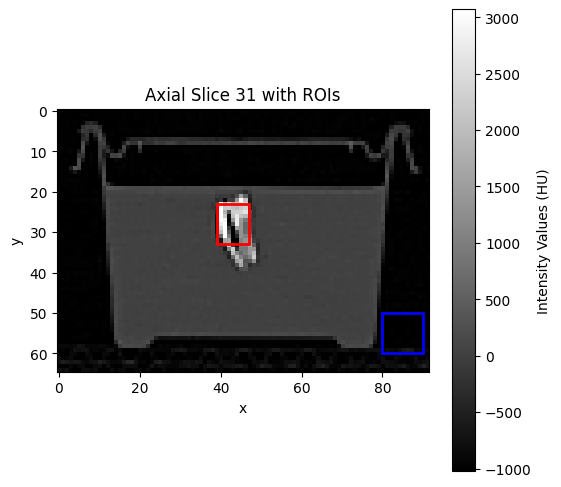

Mean Signal (Object ROI): 1251.325
Standard Deviation of Noise (Noise ROI): 79.48895772369896
Signal-to-Noise Ratio (SNR): 15.74


In [85]:
### Define and plot ROIs on the axial slice
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_cropped and img_axial_all_slices are already defined

# Step 1: Choose the ROI positions and dimensions (adjust as needed)
roi_signal_x, roi_signal_y = 39, 23  # Coordinates of the signal ROI (inside object)
roi_signal_w, roi_signal_h = 8, 10  # Width and height of the signal ROI

roi_noise_x, roi_noise_y = 80, 50  # Coordinates of the noise ROI (outside object)
roi_noise_w, roi_noise_h = 10, 10  # Width and height of the noise ROI


# Step 2: Select the axial slice to display
axial_slice_idx = 31
slice_data = img_axial_all_slices[axial_slice_idx]

# Step 3: Plot the slice and draw the ROIs
plt.figure(figsize=(6, 6))
plt.imshow(slice_data, cmap='gray')
plt.title(f'Axial Slice {axial_slice_idx} with ROIs')
plt.xlabel('x')
plt.ylabel('y')

# Draw signal ROI (red rectangle)
rectangle_signal = plt.Rectangle((roi_signal_x, roi_signal_y), roi_signal_w, roi_signal_h, edgecolor='r', facecolor='none', linewidth=2)
plt.gca().add_patch(rectangle_signal)

# Draw noise ROI (blue rectangle)
rectangle_noise = plt.Rectangle((roi_noise_x, roi_noise_y), roi_noise_w, roi_noise_h, edgecolor='b', facecolor='none', linewidth=2)
plt.gca().add_patch(rectangle_noise)

plt.colorbar(label='Intensity Values (HU)')
plt.show()

### Compute the SNR
# Step 4: Extract the pixel intensities from the ROIs

# Signal ROI
signal_roi = slice_data[roi_signal_y:roi_signal_y+roi_signal_h, roi_signal_x:roi_signal_x+roi_signal_w]
mean_signal = np.mean(signal_roi)

# Noise ROI
noise_roi = slice_data[roi_noise_y:roi_noise_y+roi_noise_h, roi_noise_x:roi_noise_x+roi_noise_w]
std_noise = np.std(noise_roi)

# Step 5: Calculate the SNR
snr = mean_signal / std_noise

# Display the results
print(f"Mean Signal (Object ROI): {mean_signal}")
print(f"Standard Deviation of Noise (Noise ROI): {std_noise}")
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f}")

In [79]:
### Compute the SNR
# Step 4: Extract the pixel intensities from the ROIs

# Signal ROI
signal_roi = slice_data[roi_signal_y:roi_signal_y+roi_signal_h, roi_signal_x:roi_signal_x+roi_signal_w]
mean_signal = np.mean(signal_roi)

# Noise ROI
noise_roi = slice_data[roi_noise_y:roi_noise_y+roi_noise_h, roi_noise_x:roi_noise_x+roi_noise_w]
std_noise = np.std(noise_roi)

# Step 5: Calculate the SNR
snr = mean_signal / std_noise

# Display the results
print(f"Mean Signal (Object ROI): {mean_signal}")
print(f"Standard Deviation of Noise (Noise ROI): {std_noise}")
print(f"Signal-to-Noise Ratio (SNR): {snr:.2f}")

Mean Signal (Object ROI): 1251.325
Standard Deviation of Noise (Noise ROI): 79.48895772369896
Signal-to-Noise Ratio (SNR): 15.74


It can be seen:
 - An SNR of 15.74 means that the signal is about 15.7 times stronger than the noise.
 - Higher SNR (>10) indicates a clearer, better-quality image, where the signal is well above the noise, making it easier to distinguish objects.

### TASK 7: Segmentation

In [80]:
# ### Step 1: Choose HU Window for Segmentation
# # Define the HU range for segmentation
# lower_bound = 500   # Adjust based on your histogram
# upper_bound = 3000  # Adjust based on your histogram


# ### Step 2: Create the Binary Mask
# # Select a specific axial slice for segmentation
# axial_slice_index = 31  # Adjust as needed
# slice_data = img_axial_all_slices[axial_slice_index]

# # Create the binary mask
# mask = np.logical_and(slice_data >= lower_bound, slice_data <= upper_bound)

# ### Step 3: Visualize the Mask and the Original Slice
# import matplotlib.pyplot as plt

# # Plot the original slice and the mask
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# # Original slice with window-level applied (optional)
# window = 400  # Adjust as needed
# level = 40    # Adjust as needed
# slice_WL, _, _ = window_level(slice_data, window, level)

# axes[0].imshow(slice_WL, cmap='gray', vmin=0, vmax=1)
# axes[0].set_title(f'Axial Slice {axial_slice_index} (Windowed)')
# axes[0].set_xlabel('x')
# axes[0].set_ylabel('y')

# # Mask visualization
# axes[1].imshow(mask, cmap='gray')
# axes[1].set_title('Segmentation Mask')
# axes[1].set_xlabel('x')
# axes[1].set_ylabel('y')

# plt.tight_layout()
# plt.show()

# ### Step 4: Calculate the Size of the Segmented Area
# # Count the number of pixels in the mask
# num_pixels = np.count_nonzero(mask)

# # Get pixel dimensions from the header (from Task 5)
# pixel_dims = img.header.get_zooms()  # (pixel_size_x, pixel_size_y, pixel_size_z)

# # Calculate the area of a single pixel (assuming square pixels)
# pixel_area = pixel_dims[0] * pixel_dims[1]  # in mm^2

# # Calculate the total area of the segmented region
# segmented_area = num_pixels * pixel_area  # in mm^2

# print(f"Number of segmented pixels: {num_pixels}")
# print(f"Area of one pixel: {pixel_area:.2f} mm²")
# print(f"Total segmented area: {segmented_area:.2f} mm²")


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider, FloatSlider, Button, VBox, Output, Tab
import os
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# Define window-level adjustment function
def window_level(slice_data, window, level):
    min_bound = level - (window / 2)
    max_bound = level + (window / 2)
    slice_WL = np.clip((slice_data - min_bound) / (max_bound - min_bound), 0, 1)
    return slice_WL, min_bound, max_bound

# Visualization and saving function for all views
def visualize_and_save(slice_type, slice_index, lower_bound, upper_bound, window, level, save=False):
    global img_axial_all_slices, img_sagittal_all_slices, img_coronal_all_slices, pixel_dims
    
    # Select appropriate slice data
    if slice_type == "Axial":
        slice_data = np.flip(img_axial_all_slices[slice_index])
        pixel_dim = pixel_dims[0]
    elif slice_type == "Sagittal":
        slice_data = np.flip(img_sagittal_all_slices[slice_index], axis=0)
        pixel_dim = pixel_dims[1]
    elif slice_type == "Coronal":
        slice_data = img_coronal_all_slices[slice_index]
        pixel_dim = pixel_dims[2]

    # Apply window-level transformation
    slice_WL, _, _ = window_level(slice_data, window, level)

    # Create the binary mask
    mask = np.logical_and(slice_data >= lower_bound, slice_data <= upper_bound)

    # Plot the original slice and mask
    with output:  # Use Output widget for controlled display
        output.clear_output(wait=True)
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Show the window-leveled image
        im = axes[0].imshow(slice_WL, cmap='gray', vmin=0, vmax=1, origin='lower')
        axes[0].set_title(f'{slice_type} Slice {slice_index} (Window_Level:{window} Window_Width:{level})')

        # Show the segmentation mask
        mask_im = axes[1].imshow(mask, cmap='gray', origin='lower')
        axes[1].set_title('Segmentation Mask')

        # Adjust axis labels based on slice_type
        if slice_type == "Axial":
            # x-axis: Right lateral (left) --> Left lateral (right)
            # y-axis: Posterior (bottom) --> Anterior (top)
            for ax in axes:
                ax.set_xlabel('<-- Right lateral -- Left lateral -->')
                ax.set_ylabel('<-- Posterior -- Anterior -->')

        elif slice_type == "Coronal":
            # x-axis: Inferior (left) --> Superior (right)
            # y-axis: Left lateral (bottom) --> Right lateral (top)
            for ax in axes:
                ax.set_xlabel('<-- Inferior -- Superior -->')
                ax.set_ylabel('<-- Left lateral -- Right lateral -->')

        elif slice_type == "Sagittal":
            # x-axis: Inferior (left) --> Superior (right)
            # y-axis: Posterior (bottom) --> Anterior (top)
            for ax in axes:
                ax.set_xlabel('<-- Inferior -- Superior -->')
                ax.set_ylabel('<-- Posterior -- Anterior -->')

        # Add scalebars
        scalebar_length_mm = 10  # Desired scalebar length in mm
        scalebar_length_px = scalebar_length_mm / pixel_dim
        fontprops = fm.FontProperties(size=12)

        # Scalebar for original slice
        scalebar_0 = AnchoredSizeBar(axes[0].transData,
                                     scalebar_length_px,
                                     f'{scalebar_length_mm} mm',
                                     'lower right',
                                     pad=0.5,
                                     color='white',
                                     frameon=False,
                                     size_vertical=2,
                                     fontproperties=fontprops)
        axes[0].add_artist(scalebar_0)

        # Scalebar for mask
        scalebar_1 = AnchoredSizeBar(axes[1].transData,
                                     scalebar_length_px,
                                     f'{scalebar_length_mm} mm',
                                     'lower right',
                                     pad=0.5,
                                     color='white',
                                     frameon=False,
                                     size_vertical=2,
                                     fontproperties=fontprops)
        axes[1].add_artist(scalebar_1)

        plt.tight_layout()
        plt.show()

    # Optionally save images
    if save:
        output_dir = f"segmented_slices/{slice_type.lower()}"
        os.makedirs(output_dir, exist_ok=True)
        fig.savefig(os.path.join(output_dir, f"{slice_type}_slice_{slice_index}_HU_{lower_bound}_{upper_bound}_W{window}_L{level}.png"))
        print(f"Saved: {slice_type}_slice_{slice_index}_HU_{lower_bound}_{upper_bound}_Window_Level{window}_Window_Width{level}.png")
    plt.close(fig)


# Create the sliders
slice_slider = IntSlider(value=0, min=0, max=np.array(img_axial_all_slices).shape[0] - 1, description='Slice')
lower_slider = FloatSlider(value=500, min=-1000, max=4000, step=50, description='Lower HU')
upper_slider = FloatSlider(value=3000, min=-1000, max=4000, step=50, description='Upper HU')
window_slider = FloatSlider(value=400, min=0, max=2000, step=50, description='Window Level')
level_slider = FloatSlider(value=40, min=-1000, max=1000, step=50, description='Window Width')

save_button = Button(description="Save Image")
output = Output()

# Update visualization based on selected view
def update_visualization(*args):
    visualize_and_save(current_view, slice_slider.value, lower_slider.value, upper_slider.value, window_slider.value, level_slider.value, save=False)

slice_slider.observe(update_visualization, names='value')
lower_slider.observe(update_visualization, names='value')
upper_slider.observe(update_visualization, names='value')
window_slider.observe(update_visualization, names='value')
level_slider.observe(update_visualization, names='value')

# Save button functionality
def on_save_clicked(b):
    visualize_and_save(current_view, slice_slider.value, lower_slider.value, upper_slider.value, window_slider.value, level_slider.value, save=True)

save_button.on_click(on_save_clicked)

# Tabs for switching between views
views = ["Axial", "Sagittal", "Coronal"]
current_view = "Axial"

def on_tab_change(change):
    global current_view
    current_view = views[change['new']]
    slice_slider.max = np.array(eval(f"img_{current_view.lower()}_all_slices")).shape[0] - 1
    update_visualization()

tab_children = []
for view in views:
    tab_children.append(
        VBox([slice_slider, lower_slider, upper_slider, window_slider, level_slider, save_button, output])
    )

tabs = Tab(children=tab_children)
for i, view in enumerate(views):
    tabs.set_title(i, view)

tabs.observe(on_tab_change, names='selected_index')

# Display the UI
display(tabs)

# Trigger initial visualization
update_visualization()


Saved: Axial_slice_53_HU_50.0_150.0_Window_Level200.0_Window_Width50.0.png


Saved: Axial_slice_31_HU_500.0_4000.0_Window_Level1500.0_Window_Width300.0.png


Saved: Sagittal_slice_43_HU_500.0_4000.0_Window_Level1500.0_Window_Width300.0.png


Saved: Sagittal_slice_57_HU_50.0_150.0_Window_Level200.0_Window_Width50.0.png


Saved: Coronal_slice_30_HU_50.0_150.0_Window_Level200.0_Window_Width50.0.png


Saved: Coronal_slice_36_HU_500.0_4000.0_Window_Level1500.0_Window_Width300.0.png


Bonus TASK

In [82]:
# Define the range of slices that contain the object
start_slice = 27  # Adjust based on where the object starts (look at the slices earlier)
end_slice = 41    # Adjust based on where the object ends

# Initialize total volume
total_volume = 0

# Loop through the slices
for slice_idx in range(start_slice, end_slice + 1):
    # Extract the slice data
    slice_data = img_axial_all_slices[slice_idx]
    
    # Create the binary mask
    mask = np.logical_and(slice_data >= lower_bound, slice_data <= upper_bound)
    
    # Count the number of pixels in the mask
    num_pixels = np.count_nonzero(mask)
    
    # Calculate the volume contributed by this slice
    slice_thickness = pixel_dims[2]  # Slice thickness in mm
    voxel_volume = pixel_dims[0] * pixel_dims[1] * slice_thickness  # Volume of one voxel in mm³
    slice_volume = num_pixels * voxel_volume  # Volume of the segmented region in this slice
    
    # Add to total volume
    total_volume += slice_volume

# Convert total volume to cm³
total_volume_cm3 = total_volume / 1000  # 1 cm³ = 1000 mm³

print(f"Total segmented volume: {total_volume_cm3:.2f} cm³")

NameError: name 'lower_bound' is not defined